# Vision Pipeline Testbed

**Purpose:** This notebook is for testing the complete vision pipeline (`YOLOProcessor` + `DBSCANAnalyzer`) on a single image from the `data/input_images` directory.

**Goal:** To verify that vehicle detection, counting, and density analysis are working as expected for one lane before running the main script on all lanes.

### 1. Import Necessary Libraries

In [16]:
import os
import sys
from PIL import Image
import matplotlib.pyplot as plt

# Add the 'src' directory to the Python path to import our modules
# This allows the notebook to find your custom source code
sys.path.append(os.path.abspath(os.path.join('..')))

from src.vision.yolo_processor import YOLOProcessor
from src.vision.dbscan_analyzer import DBSCANAnalyzer

### 2. Configure Test Parameters

In [17]:
# --- Parameters to Change ---
# Specify the image you want to test from the 'data/input_images' folder
TEST_IMAGE_NAME = "lane_east.jpg" # <-- CHANGE THIS to lane_south.jpg, etc.

# --- Paths and Models ---
INPUT_DIR = "../data/input_images"
YOLO_MODEL_PATH = "../yolov8n.pt" # The path is relative to the notebooks folder

image_path = os.path.join(INPUT_DIR, TEST_IMAGE_NAME)

### 3. Initialize Processors

In [18]:
print("Initializing YOLO and DBSCAN processors...")
yolo_processor = YOLOProcessor(YOLO_MODEL_PATH)
# Use the same parameters as the main script (from thesis section 3.3.2)
dbscan_analyzer = DBSCANAnalyzer(eps=30, min_samples=2)

Initializing YOLO and DBSCAN processors...
YOLOv8 Processor initialized for vehicle detection.
DBSCANAnalyzer initialized with eps=30, min_samples=2


### 4. Run the Vision Pipeline

In [19]:
# Step 1: Detect vehicles using YOLOv8
print(f"\nRunning YOLOv8 on '{TEST_IMAGE_NAME}'...")
detections, annotated_image = yolo_processor.detect_vehicles(image_path)
print(f"Detection complete. Found {len(detections)} vehicles.")

# Step 2: Analyze detections using DBSCAN
print("Running DBSCAN analysis...")
lane_state = dbscan_analyzer.analyze_single_lane(detections)
print("Analysis complete.")


Running YOLOv8 on 'lane_east.jpg'...
Detection complete. Found 19 vehicles.
Running DBSCAN analysis...
Analysis complete.


### 5. Display Results


--- TEST RESULTS ---
Image: lane_east.jpg
Vehicle Count: 19
Density Score: 0.3
--------------------


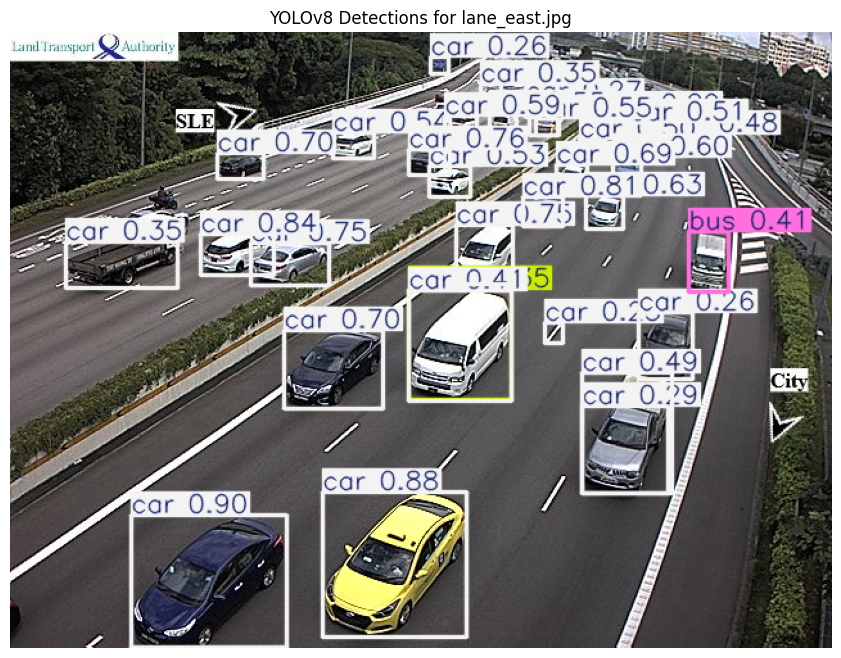

In [20]:
print("\n--- TEST RESULTS ---")
print(f"Image: {TEST_IMAGE_NAME}")
print(f"Vehicle Count: {lane_state['vehicle_count']}")
print(f"Density Score: {lane_state['density_score']}")
print("--------------------")

# Display the annotated image
if annotated_image:
    plt.figure(figsize=(12, 8))
    plt.imshow(annotated_image)
    plt.title(f"YOLOv8 Detections for {TEST_IMAGE_NAME}")
    plt.axis('off')
    plt.show()
else:
    print("Could not generate annotated image or image not found.")